In [2]:
# Load necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load preprocessed data
data = pd.read_csv('/content/preprocessed_data.csv')  # Adjusted path to the uploaded file

# Handle missing values (drop or impute)
# Dropping columns with excessive missing values
data = data.dropna(axis=1, thresh=int(0.7 * len(data)))

# Investigate columns with mixed types
for column in data.columns:
    unique_types = set(data[column].map(type))
    if len(unique_types) > 1:  # Mixed data types
        print(f"Column '{column}' has mixed types: {unique_types}")

# Convert problematic columns to strings
for column in data.columns:
    if data[column].map(type).nunique() > 1:  # Mixed types
        data[column] = data[column].astype(str)

# Handle missing values (drop or impute)
data = data.dropna(axis=1, thresh=int(0.7 * len(data)))  # Drop columns with >30% missing values

# Fill remaining missing values with median for numeric and mode for categorical
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].median(), inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = data.drop(['TotalPremium', 'TotalClaims'], axis=1)  # Features
y_premium = data['TotalPremium']  # Target for premium prediction
y_claims = data['TotalClaims']  # Target for claims prediction

# Train-Test Split
X_train, X_test, y_premium_train, y_premium_test = train_test_split(X, y_premium, test_size=0.3, random_state=42)
_, _, y_claims_train, y_claims_test = train_test_split(X, y_claims, test_size=0.3, random_state=42)

print("Data preparation complete!")

Column 'TermFrequency' has mixed types: {<class 'float'>, <class 'str'>}
Column 'ExcessSelected' has mixed types: {<class 'float'>, <class 'str'>}
Column 'CoverCategory' has mixed types: {<class 'float'>, <class 'str'>}
Column 'CoverType' has mixed types: {<class 'float'>, <class 'str'>}
Column 'CoverGroup' has mixed types: {<class 'float'>, <class 'str'>}
Column 'Section' has mixed types: {<class 'float'>, <class 'str'>}
Column 'Product' has mixed types: {<class 'float'>, <class 'str'>}
Column 'StatutoryClass' has mixed types: {<class 'float'>, <class 'str'>}
Column 'StatutoryRiskType' has mixed types: {<class 'float'>, <class 'str'>}
Data preparation complete!


<ipython-input-2-f33da0e5a934>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
<ipython-input-2-f33da0e5a934>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
lr_premium = LinearRegression()
lr_claims = LinearRegression()

# Train the model on TotalPremium
lr_premium.fit(X_train, y_premium_train)

# Train the model on TotalClaims
lr_claims.fit(X_train, y_claims_train)

# Predict on the test set
y_premium_pred = lr_premium.predict(X_test)
y_claims_pred = lr_claims.predict(X_test)

# Evaluate TotalPremium predictions
print("Performance for TotalPremium:")
print("R² Score:", r2_score(y_premium_test, y_premium_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_premium_test, y_premium_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_premium_test, y_premium_pred))

# Evaluate TotalClaims predictions
print("\nPerformance for TotalClaims:")
print("R² Score:", r2_score(y_claims_test, y_claims_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_claims_test, y_claims_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_claims_test, y_claims_pred))

Performance for TotalPremium:
R² Score: 0.6231278331236854
Mean Absolute Error (MAE): 56.80812519231774
Mean Squared Error (MSE): 13294.510634487262

Performance for TotalClaims:
R² Score: 0.0023493603725386336
Mean Absolute Error (MAE): 204.92190106706028
Mean Squared Error (MSE): 17097933.348715357


In [4]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_premium = RandomForestRegressor(random_state=42, n_estimators=100)
rf_claims = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model on TotalPremium
rf_premium.fit(X_train, y_premium_train)

# Train the model on TotalClaims
rf_claims.fit(X_train, y_claims_train)

# Predict on the test set
y_premium_pred_rf = rf_premium.predict(X_test)
y_claims_pred_rf = rf_claims.predict(X_test)

# Evaluate TotalPremium predictions
print("Random Forest Performance for TotalPremium:")
print("R² Score:", r2_score(y_premium_test, y_premium_pred_rf))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_premium_test, y_premium_pred_rf))
print("Mean Squared Error (MSE):", mean_squared_error(y_premium_test, y_premium_pred_rf))

# Evaluate TotalClaims predictions
print("\nRandom Forest Performance for TotalClaims:")
print("R² Score:", r2_score(y_claims_test, y_claims_pred_rf))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_claims_test, y_claims_pred_rf))
print("Mean Squared Error (MSE):", mean_squared_error(y_claims_test, y_claims_pred_rf))

Random Forest Performance for TotalPremium:
R² Score: 0.9300980143217282
Mean Absolute Error (MAE): 11.58951812003206
Mean Squared Error (MSE): 2465.8565255007297

Random Forest Performance for TotalClaims:
R² Score: -0.06615474108910258
Mean Absolute Error (MAE): 155.46359697766104
Mean Squared Error (MSE): 18271970.14514557


In [5]:
from xgboost import XGBRegressor

# Initialize the XGBoost Regressor
xgb_premium = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_claims = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)

# Train the model on TotalPremium
xgb_premium.fit(X_train, y_premium_train)

# Train the model on TotalClaims
xgb_claims.fit(X_train, y_claims_train)

# Predict on the test set
y_premium_pred_xgb = xgb_premium.predict(X_test)
y_claims_pred_xgb = xgb_claims.predict(X_test)

# Evaluate TotalPremium predictions
print("XGBoost Performance for TotalPremium:")
print("R² Score:", r2_score(y_premium_test, y_premium_pred_xgb))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_premium_test, y_premium_pred_xgb))
print("Mean Squared Error (MSE):", mean_squared_error(y_premium_test, y_premium_pred_xgb))

# Evaluate TotalClaims predictions
print("\nXGBoost Performance for TotalClaims:")
print("R² Score:", r2_score(y_claims_test, y_claims_pred_xgb))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_claims_test, y_claims_pred_xgb))
print("Mean Squared Error (MSE):", mean_squared_error(y_claims_test, y_claims_pred_xgb))

XGBoost Performance for TotalPremium:
R² Score: 0.905511467434332
Mean Absolute Error (MAE): 21.764746393886224
Mean Squared Error (MSE): 3333.169470813251

XGBoost Performance for TotalClaims:
R² Score: -0.13285526410927884
Mean Absolute Error (MAE): 172.00898537189482
Mean Squared Error (MSE): 19415096.858670544


In [9]:
print(data.columns)

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice',
       'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt',
       'Converted', 'CrossBorder', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims'],
      dtype='object')


In [10]:
import numpy as np

# Create interaction terms based on available columns
data['Premium_Per_SumInsured'] = data['TotalPremium'] / (data['SumInsured'] + 1)  # Avoid division by zero
data['Claims_Per_SumInsured'] = data['TotalClaims'] / (data['SumInsured'] + 1)

# Create derived features
data['Claims_to_Premium_Ratio'] = data['TotalClaims'] / (data['TotalPremium'] + 1)  # Avoid division by zero

# Temporal features (if available in the dataset)
if 'TransactionMonth' in data.columns:
    data['TransactionYear'] = pd.to_datetime(data['TransactionMonth']).dt.year
    average_claims_by_year = data.groupby('TransactionYear')['TotalClaims'].transform('mean')
    data['Avg_Yearly_Claims'] = average_claims_by_year
else:
    data['TransactionYear'] = 2023  # Default value for missing column
    data['Avg_Yearly_Claims'] = data['TotalClaims'].mean()

# Display the new features
print(data[['Premium_Per_SumInsured', 'Claims_Per_SumInsured', 'Claims_to_Premium_Ratio',
            'TransactionYear', 'Avg_Yearly_Claims']].head())


   Premium_Per_SumInsured  Claims_Per_SumInsured  Claims_to_Premium_Ratio  \
0               21.712698                    0.0                      0.0   
1               21.712698                    0.0                      0.0   
2                0.000000                    0.0                      0.0   
3                0.004299                    0.0                      0.0   
4                0.000000                    0.0                      0.0   

   TransactionYear  Avg_Yearly_Claims  
0             1970          69.060913  
1             1970          69.060913  
2             1970          69.060913  
3             1970          69.060913  
4             1970          69.060913  


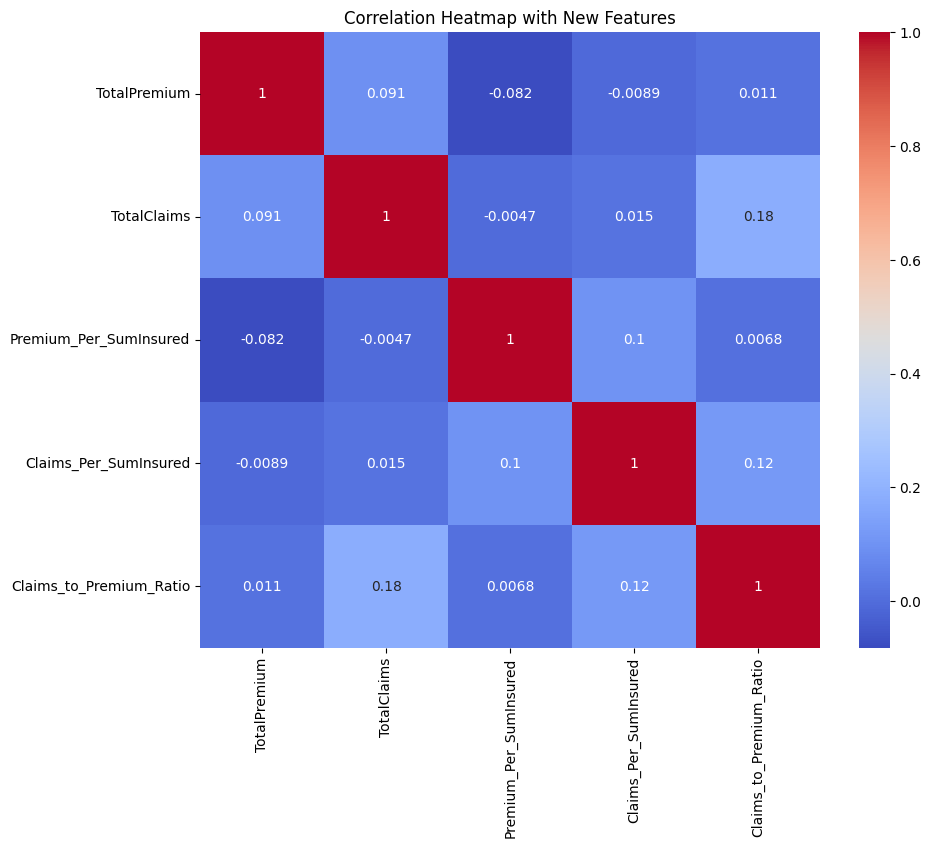

In [11]:
# Correlation heatmap with new features
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data[['TotalPremium', 'TotalClaims', 'Premium_Per_SumInsured',
                           'Claims_Per_SumInsured', 'Claims_to_Premium_Ratio']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap with New Features")
plt.show()

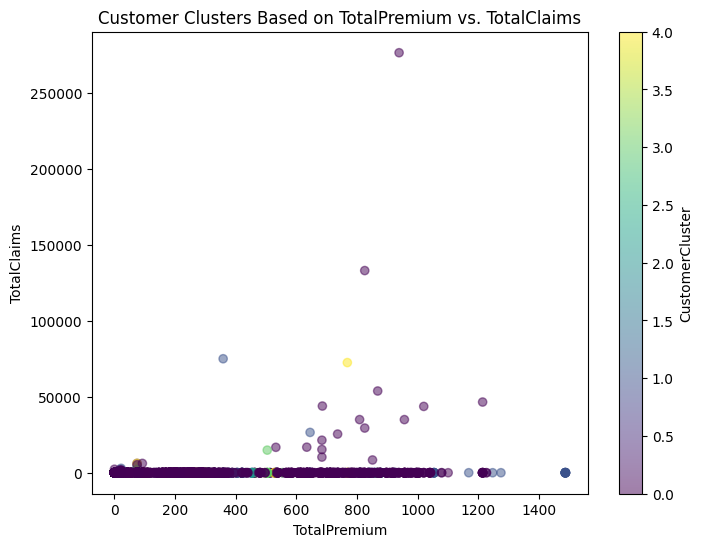

Clusters added! Updated dataset saved as 'data/clustered_data.csv'


In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Prepare data for clustering
clustering_features_customer = ['MaritalStatus', 'Gender', 'Bank', 'Language']
clustering_features_location = ['PostalCode', 'TotalPremium', 'TotalClaims']

# Encode categorical features
label_encoders = {}
for feature in clustering_features_customer:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# Standardize numerical features for clustering
scaler = StandardScaler()

# Customer Profile Clustering
customer_data = scaler.fit_transform(data[clustering_features_customer])
kmeans_customer = KMeans(n_clusters=5, random_state=42)  # Adjust k as needed
data['CustomerCluster'] = kmeans_customer.fit_predict(customer_data)

# Location-Based Clustering
location_data = scaler.fit_transform(data[clustering_features_location])
kmeans_location = KMeans(n_clusters=5, random_state=42)  # Adjust k as needed
data['LocationCluster'] = kmeans_location.fit_predict(location_data)

# Visualize Clusters (optional, for analysis)
plt.figure(figsize=(8, 6))
plt.scatter(data['TotalPremium'], data['TotalClaims'], c=data['CustomerCluster'], cmap='viridis', alpha=0.5)
plt.colorbar(label='CustomerCluster')
plt.xlabel('TotalPremium')
plt.ylabel('TotalClaims')
plt.title('Customer Clusters Based on TotalPremium vs. TotalClaims')
plt.show()

# Save the clustered data
data.to_csv("/content/clustered_data.csv", index=False)
print("Clusters added! Updated dataset saved as 'data/clustered_data.csv'")

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# Define features and target
features = ['SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
            'ExcessSelected', 'CustomerCluster', 'LocationCluster']
X = data[features]
y_premium = data['TotalPremium']
y_claims = data['TotalClaims']

# Train-test split
X_train, X_test, y_premium_train, y_premium_test = train_test_split(X, y_premium, test_size=0.3, random_state=42)
_, _, y_claims_train, y_claims_test = train_test_split(X, y_claims, test_size=0.3, random_state=42)

# Linear Regression
lin_reg_premium = LinearRegression()
lin_reg_premium.fit(X_train, y_premium_train)
premium_predictions_lr = lin_reg_premium.predict(X_test)

lin_reg_claims = LinearRegression()
lin_reg_claims.fit(X_train, y_claims_train)
claims_predictions_lr = lin_reg_claims.predict(X_test)

# Random Forest
rf_premium = RandomForestRegressor(random_state=42)
rf_premium.fit(X_train, y_premium_train)
premium_predictions_rf = rf_premium.predict(X_test)

rf_claims = RandomForestRegressor(random_state=42)
rf_claims.fit(X_train, y_claims_train)
claims_predictions_rf = rf_claims.predict(X_test)

# XGBoost
xgb_premium = XGBRegressor(random_state=42)
xgb_premium.fit(X_train, y_premium_train)
premium_predictions_xgb = xgb_premium.predict(X_test)

xgb_claims = XGBRegressor(random_state=42)
xgb_claims.fit(X_train, y_claims_train)
claims_predictions_xgb = xgb_claims.predict(X_test)

# Performance Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"R² Score: {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print("-" * 30)

# Evaluate Models
print("For TotalPremium:")
evaluate_model(y_premium_test, premium_predictions_lr, "Linear Regression")
evaluate_model(y_premium_test, premium_predictions_rf, "Random Forest")
evaluate_model(y_premium_test, premium_predictions_xgb, "XGBoost")

print("\nFor TotalClaims:")
evaluate_model(y_claims_test, claims_predictions_lr, "Linear Regression")
evaluate_model(y_claims_test, claims_predictions_rf, "Random Forest")
evaluate_model(y_claims_test, claims_predictions_xgb, "XGBoost")

For TotalPremium:
Linear Regression Performance:
R² Score: 0.637014009418543
Mean Absolute Error (MAE): 57.408909721035585
Mean Squared Error (MSE): 12804.663055785764
------------------------------
Random Forest Performance:
R² Score: 0.9859556093884012
Mean Absolute Error (MAE): 8.525408729506342
Mean Squared Error (MSE): 495.4287335367743
------------------------------
XGBoost Performance:
R² Score: 0.9848360681418238
Mean Absolute Error (MAE): 9.40913948917801
Mean Squared Error (MSE): 534.9215757164825
------------------------------

For TotalClaims:
Linear Regression Performance:
R² Score: 0.0032792497751920058
Mean Absolute Error (MAE): 180.12085920153226
Mean Squared Error (MSE): 17081996.72080503
------------------------------
Random Forest Performance:
R² Score: 0.2754962531838012
Mean Absolute Error (MAE): 116.4257139226623
Mean Squared Error (MSE): 12416688.048817981
------------------------------
XGBoost Performance:
R² Score: 0.631730128060454
Mean Absolute Error (MAE): 9

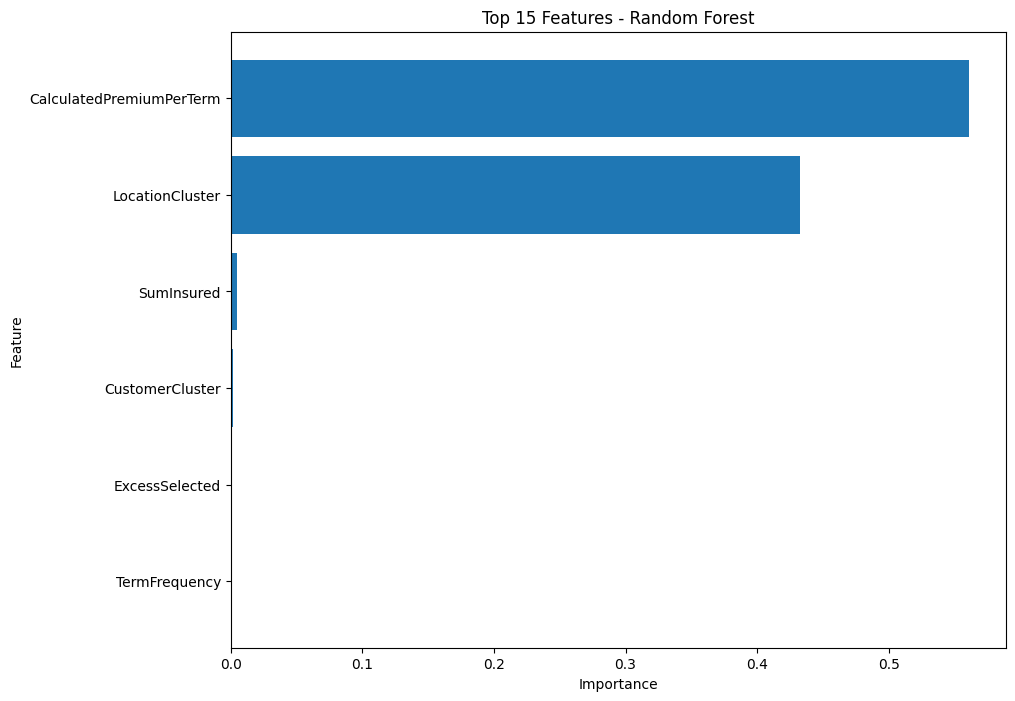

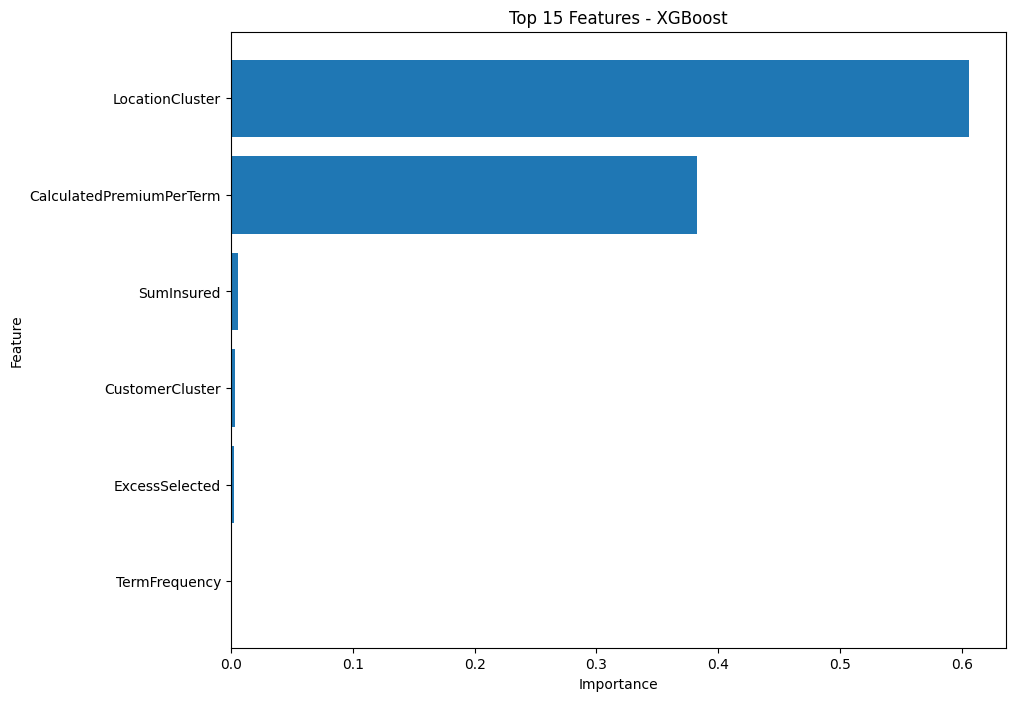

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Train the Random Forest and XGBoost models (if not already trained)
# Assuming Random Forest and XGBoost models are already trained as rf_model and xgb_model

# Random Forest Feature Importance
rf_importance = rf_premium.feature_importances_
rf_features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_importance
}).sort_values(by='Importance', ascending=False)

# Plot Random Forest Feature Importance
plt.figure(figsize=(10, 8))
plt.barh(rf_features['Feature'][:15], rf_features['Importance'][:15])
plt.gca().invert_yaxis()
plt.title('Top 15 Features - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# XGBoost Feature Importance
xgb_importance = xgb_premium.feature_importances_
xgb_features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_importance
}).sort_values(by='Importance', ascending=False)

# Plot XGBoost Feature Importance
plt.figure(figsize=(10, 8))
plt.barh(xgb_features['Feature'][:15], xgb_features['Importance'][:15])
plt.gca().invert_yaxis()
plt.title('Top 15 Features - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Optional: Compare overlapping top features

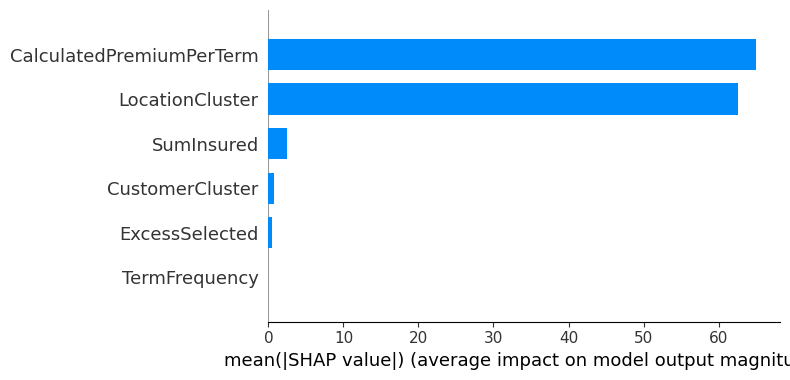

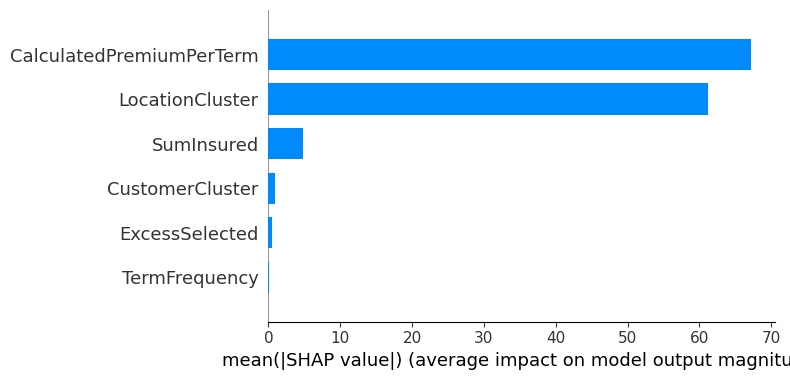

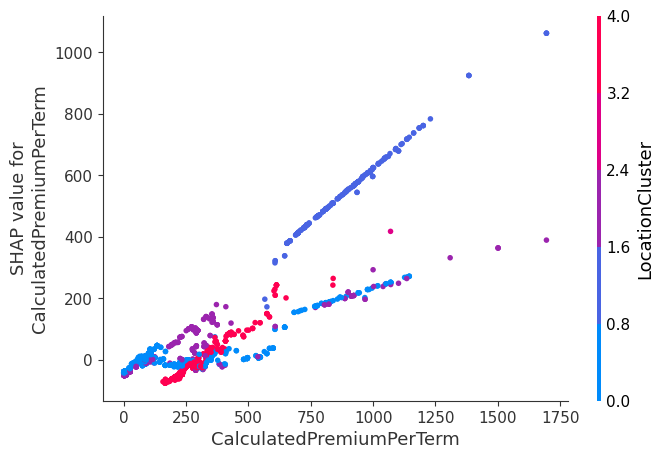

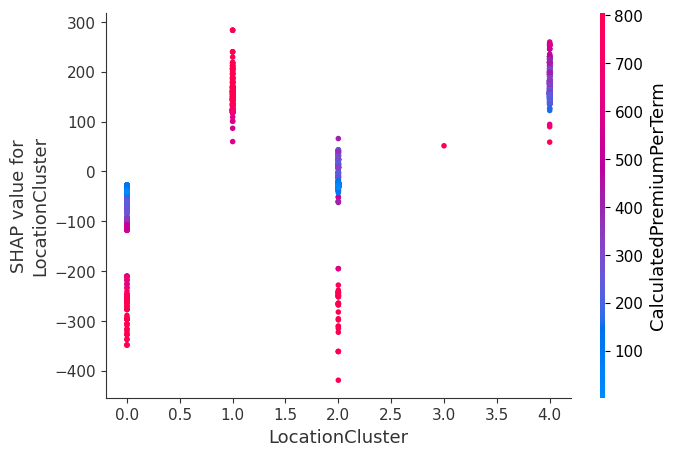

In [22]:
import shap

# Initialize the SHAP explainer for Random Forest
rf_explainer = shap.TreeExplainer(rf_premium)
rf_shap_values = rf_explainer.shap_values(X_test)

# SHAP summary plot for Random Forest
shap.summary_plot(rf_shap_values, X_test, plot_type="bar", show=True)

# Initialize the SHAP explainer for XGBoost
xgb_explainer = shap.TreeExplainer(xgb_premium)
xgb_shap_values = xgb_explainer.shap_values(X_test)

# SHAP summary plot for XGBoost
shap.summary_plot(xgb_shap_values, X_test, plot_type="bar", show=True)

# Optional: Dependence plot for a specific feature
shap.dependence_plot("CalculatedPremiumPerTerm", rf_shap_values, X_test)
shap.dependence_plot("LocationCluster", xgb_shap_values, X_test)